In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

GR-Citrus analogread analysis

N=1024 sampling 1024 time log
[Sun Jul 03 17:15:45.534 2016] start
[Sun Jul 03 17:16:30.870 2016] finished


In [49]:
si=(60+30.870-45.534)
print("sampling interval for N=1024: ", si)
freq=1/(si/1024/1024)
print("sampling frequency : ", freq, "Hz")

sampling interval for N=1024:  45.336000000000006
sampling frequency :  23128.992412211042 Hz


In [12]:
0.0442734375/4


0.011068359375

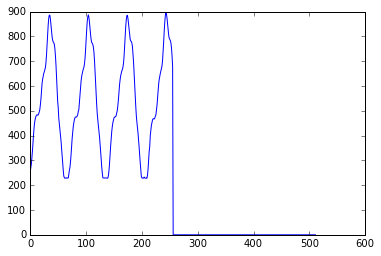

In [25]:
data=np.loadtxt('citrus.dat', delimiter=',')
plt.plot(data)

In [19]:
k=np.log10(2**(1/12))
notes=np.round(np.log10(670/27.5)/k)+21
print(notes)

76.0


In [50]:
idx=69
t_per_sample=si/1024/1024
print(t_per_sample)
print(1/(idx*t_per_sample))

4.3235778808593755e-05
335.2027885827688


512
85726557.0
171453114.0


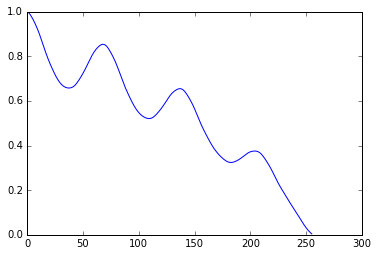

In [43]:
def funcM(x,t):
    ret=sum(x[0:256])+sum(x[t:256+t])
    return ret
x = data[:,0]
print(np.size(x))
# smarter way paper
F=np.fft.fft(x)
ps=np.real(F*np.conjugate(F))
r=np.real(np.fft.ifft(ps))
x2=x*x
m=np.zeros(256)
for i in np.arange(256):
    m[i]=funcM(x2,i)
print(r[0])
print(m[0])
r=r[0:256]
nsdf=2*r/m
plt.plot(nsdf)